In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

## Coin flip example

We have to flip 5 coins to get heads or tails. We want to report back the total number of heads and the total number of tails. We want to know whether our experiment matches our prediction.

How do we do this? Define **`heads = 1`** and **`tails = 0`**. Now we can talk to the computer. Now what?

*Google:* `random uniform 0 1 integers python`

Google tells me to use **`np.random.randint`**. Let us try that:

In [4]:
draw = np.random.randint(3, size=10) # Google suggested this
heads_count = len(draw[np.where(draw == 1)])
tails_count = len(draw[(np.where(draw == 0))])
side_count = len(draw[(np.where(draw == 2))])
print(heads_count, tails_count, side_count) # Does the answer make sense?

5 2 3


So we have flipped a set of 5 coins once and we count heads and tails. Can we infer the probability of getting 0 heads from flipping 5 coins? How about 5 heads? How about 1,2,3 or 4 heads? What do we need to do?

Add a for loop and flip the set of 5 coins 10 times:

In [5]:
for i in range(0,10):
    draw = np.random.randint(2, size=5)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    print(heads_count, tails_count)

2 3
1 4
3 2
3 2
2 3
3 2
3 2
1 4
3 2
4 1


Now, how many 0s? 1s? 2s? 3s? 4s? 5s? Make this easier.....

In [6]:
counts = np.zeros(6)
print(counts)
for i in range(0,10):
    draw = np.random.randint(2, size=5)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] + 1
    print(counts)

[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.]
[ 0.  0.  1.  1.  0.  0.]
[ 0.  0.  1.  1.  0.  1.]
[ 1.  0.  1.  1.  0.  1.]
[ 1.  0.  1.  2.  0.  1.]
[ 1.  0.  1.  3.  0.  1.]
[ 1.  1.  1.  3.  0.  1.]
[ 1.  1.  2.  3.  0.  1.]
[ 1.  1.  3.  3.  0.  1.]
[ 1.  1.  3.  4.  0.  1.]


We need **a lot** more flips of the set of 5 coins. Try 100.

[ 0.  0.  0.  0.  0.  0.]
[  2.  19.  35.  24.  15.   5.]


<Container object of 6 artists>

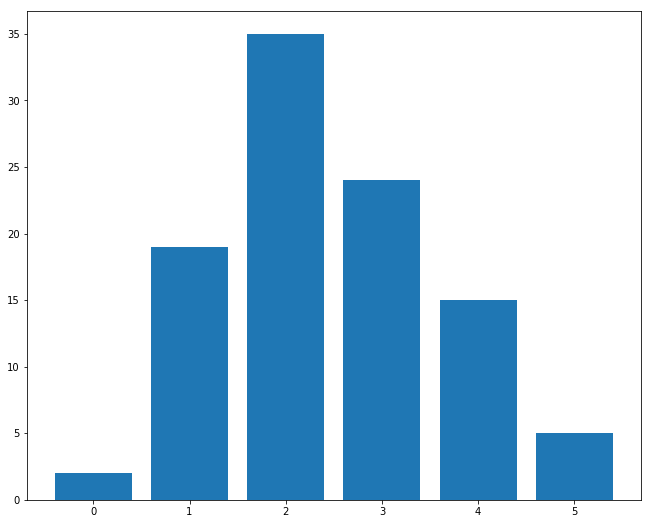

In [7]:
counts = np.zeros(6)
print(counts)
for i in range(0,100):
        draw = np.random.randint(2, size=5)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
print (counts)
plt.bar(np.arange(6), counts)

## The Binomial Theorem 

Now, over plot a theory curve, which is a representation of the binomial series for p=0.5 (general binomial distribution is slightly different!):
$P(x=n) = \frac{N!}{n!(N-n)!}p^N$

What is $n$? $N$? 

$N$ is the total number of coins being flipped.
$n$ is the number of heads you observe.

In [8]:
from scipy.misc import factorial
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
print(PNx(5))

[ 0.03125  0.15625  0.3125   0.3125   0.15625  0.03125]


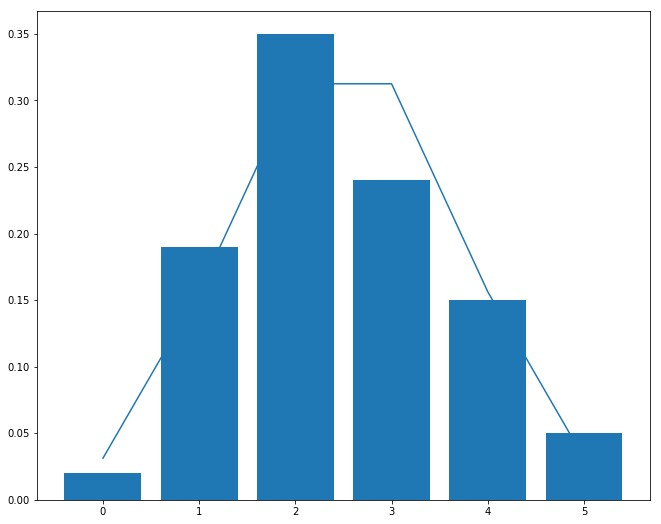

In [9]:
plt.bar(np.arange(6), counts/100.0)
plt.plot(np.arange(6), PNx(5))

What did we learn? 

1. How to make an "experiment" in an iPython Notebook (i.e., on a computer).  <font color="crimson">This exercise was a computer simulation!</font>

2. Analytic statistical theory makes sense in the limit of large $N$.  <font color ="crimson"> What do we do when N is small?</font>

How about we have a little fun and make a movie, this time flipping 10 coins. Our story is to watch as the observed binomial theory converges on the theoretical binomial theorem. How many frames do we need (where each frame includes an additional role of the 10 coins) before life imitates "theory"?

*Note: The following cell may take around a minute to compute*

In [10]:
N_coins = 10

# First set up the figure, the axis, and the plot element we want to animate
PN_mid = max(PNx(N_coins))
fig = plt.figure()
ax = plt.axes(xlim=(0, N_coins), ylim=(0, PN_mid*1.2))
line, = ax.plot(np.arange(N_coins+1), np.zeros(N_coins+1), drawstyle="steps-mid")

# initialization function: plot the background of each frame
def init():
    plt.plot(np.arange(N_coins+1), PNx(N_coins), color="red")
    line.set_data(np.arange(N_coins+1), np.zeros(N_coins+1))
    plt.xlabel("# of heads")
    plt.ylabel("frequency")
    return line,

# animation function.  This is called sequentially
def count_fun(i):
    flips_per_frame = 5
    counts = np.zeros(N_coins+1)
    j = (i+1)*flips_per_frame
    for k in range(j):
        draw = np.random.randint(2, size=N_coins)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
    x = np.linspace(0, N_coins, N_coins+1)
    y = counts/j
    line.set_data(x, y)
    ax.annotate("# Flips of {} coins: {}".format(N_coins, j),
                xy=(2, PN_mid), xytext=(1, PN_mid), backgroundcolor='w')
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, count_fun, init_func=init,
                               frames=100, interval=200, blit=True)

anim

Trial values of amount of heads per flipping of the set: [  0.00000000e+00   2.00000000e-05   2.00000000e-04   1.04000000e-03
   4.64000000e-03   1.49800000e-02   3.56000000e-02   7.23800000e-02
   1.22640000e-01   1.59240000e-01   1.80080000e-01   1.58820000e-01
   1.19240000e-01   7.18000000e-02   3.80000000e-02   1.57200000e-02
   4.28000000e-03   1.16000000e-03   1.20000000e-04   4.00000000e-05
   0.00000000e+00]
Theoretical value of amount of heads per flipping of the set: [  1.90734863e-11   3.81469727e-10   3.62396240e-09   2.17437744e-08
   9.24110413e-08   2.95715332e-07   7.39288330e-07   1.47857666e-06
   2.40268707e-06   3.20358276e-06   3.52394104e-06   3.20358276e-06
   2.40268707e-06   1.47857666e-06   7.39288330e-07   2.95715332e-07
   9.24110413e-08   2.17437744e-08   3.62396240e-09   3.81469727e-10
   1.90734863e-11]
E(x) for 20 coins= 10.00256
E(x) for 40 coins= 20.01816


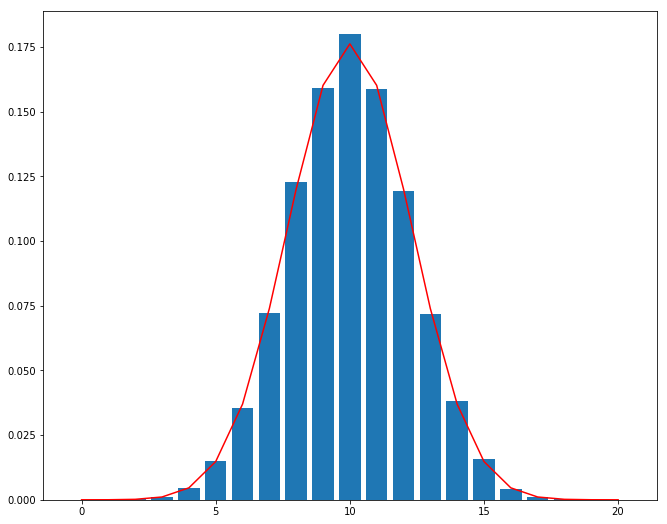

In [31]:
'''
Exercise 1
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import factorial

N = 20 #number of coins in the set
N2 = 40 #for part e
M = 50000 #amount of times you flip the set of coins. A large M will 
          #provide a consistant distribution

# vvv RANDOM TRAILS & BAR GRAPH vvv

counts = np.zeros(N+1)

for i in range(0,M):
    draw = np.random.randint(2, size=N)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] + 1 
print('Trial values of amount of heads per flipping of the set:',counts/M) 

plt.bar(np.arange(N+1), counts/M)

# vvv THEORETICAL & LINE GRAPH vvv

def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
print('Theoretical value of amount of heads per flipping of the set:',PNx(N)/M)

plt.plot(np.arange(N+1), PNx(N),color='r')

# vvv Expectation Value 20 flips vvv
i20 = (np.arange(N+1))
E20 = np.sum(i20*(counts/M))

print('E(x) for 20 coins=',E20)

# vvv Expectation Value 40 flips vvv

counts2 = np.zeros(N2+1)

for i2 in range(0,M):
    draw2 = np.random.randint(2, size=N2)
    heads_count2 = len(draw2[(np.where(draw2 == 1))])
    tails_count2 = len(draw2[(np.where(draw2 == 0))])
    counts2[heads_count2] = counts2[heads_count2] + 1 

i40 = (np.arange(N2+1))
E40 = np.sum(i40*(counts2/M))

print('E(x) for 40 coins=',E40)


In [6]:
'''vvv Importing Needed Libraries vvv'''

import numpy as np
import matplotlib.pyplot as plt 
from scipy.misc import factorial


'''vvv Variables vvv'''

prob = 0.01 #probability
N = 100 #number of coins in the set
M = 50000 #amount of times you flip the set of coins. A large M will provide a consistant distribution
counts = np.zeros(N+1) #creates an array of 0s as big as N


'''vvv Numerical Calculation and Histograph vvv'''

for i in range(0,M): #program goes through M iterations of the indented code below
    draw = np.random.uniform(0,1,size=N) #program picks N numbers between 0 and 1 and puts them in an array
    heads_count = len(draw[(np.where(draw < prob))]) #if the random number is less than the prob, records a success for heads
    tails_count = len(draw[(np.where(draw > prob))]) #if the random number is greater than the prob, records a success for tails (a loss for heads)
    counts[heads_count] = counts[heads_count] + 1 #records how many successes the head_count recorded per loop and then places how often that number of successes occured in the counts array

print('Trial values of amount of heads per flipping of the set:',counts/M)

plt.bar(np.arange(N+1), counts/M) #plots the N number of spaces in the array for the x-axis and the number of successes for heads in the y-axis


'''vvv THEORETICAL Binomial Distribution Line Graph vvv'''

def Bi(N): #defining the binomial distribution function
    xBi = (np.arange(N+1)) #creates an array of N spaces
    Bi = factorial(N)/((factorial(xBi)*factorial(N-xBi)))*((prob)**xBi)*((1-prob)**(N-xBi)) #the binomial function
    return Bi

print('Theoretical value of amount of heads per flipping of the set:',Bi(N))
plt.plot(np.arange(N+1), Bi(N),color='r') #plots the N number of spaces in the array for the x-axis and the output of the Binomial distribution function for the y-axis


'''vvv Theoretical Poisson Distribution Line Graph vvv'''

def Poi(N):
    E = (N*prob) #the expectation value calculated from N and probability 
    xPoi = (np.arange(N+1))
    Poi = ((E**xPoi)*(np.exp(-E)))/(factorial(xPoi)) #the Poisson function
    return Poi

plt.plot(np.arange(N+1), Poi(N),color='purple',linestyle='--') #plots the N number of spaces in the array for the x-axis and the output of the Binomial distribution function for the y-axis

Trial values of amount of heads per flipping of the set: [3.6338e-01 3.6686e-01 1.8710e-01 6.2740e-02 1.6200e-02 3.2000e-03
 4.2000e-04 8.0000e-05 2.0000e-05 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.00

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


In [7]:
'''vvv Expectation Value 20 flips (Question 1, part f) vvv'''

N20 = 20 #new N value for this part
counts20 = np.zeros(N20+1) #new array filled with 0s with N spaces for this part

for i1 in range(0,M):
    draw20 = np.random.randint(2, size=N20) 
    heads_count20 = len(draw20[(np.where(draw20 == 1))]) 
    tails_count20 = len(draw20[(np.where(draw20 == 0))]) 
    counts20[heads_count20] = counts20[heads_count20] + 1

i20 = (np.arange(N20+1))
E20 = np.sum((i20)*(counts20/M)) #numerically sums all successes multiplied by the N array for the expect ation value


print('E(x) for 20 coins=',E20)

E(x) for 20 coins= 9.99902


In [4]:
'''vvv Expectation Value 40 flips (Question 1, part f) vvv'''

N40 = 40
counts40 = np.zeros(N40+1)

for i2 in range(0,M):
    draw40 = np.random.randint(2, size=N40) 
    heads_count40 = len(draw40[(np.where(draw40 == 1))]) 
    tails_count40 = len(draw40[(np.where(draw40 == 0))]) 
    counts40[heads_count40] = counts40[heads_count40] + 1
    
i40 = (np.arange(N40+1))
E40 = np.sum((i40)*(counts40/M))

print('E(x) for 40 coins=',E40)

E(x) for 40 coins= 20.01132


In [8]:
'''vvv Varience (Question 2, part d) vvv'''

E2ndMom = np.sum(((np.arange(N+1))**2)*(counts/M))
E1stMomSqu = (np.sum((np.arange(N+1))*(counts/M)))**2
Var = E2ndMom - E1stMomSqu

print(Var)

1.0126225776
